# Investigation of Trip Data from Bay Area Bike Share Published Data

### Import Packages

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

import datetime

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("poster")

In [2]:
from investigationutils import time_marker as tm
from investigationutils import csv_chunk_importer

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

font = {'size'   : 50}
matplotlib.rc('font', **font)

DO_WRITE_CHARTS = True

# Load Trip Data

In [4]:
trip_data_columns = ['junk', 'trip_id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'user_type', 'user_zip', 'duration_minutes',
       'billed_minutes', 'billed_periods']

In [5]:
trips = csv_chunk_importer(file_path_slug='../../clean_data/bayareabikeshare/sf_trips_data_3hr_cleaned.csv', 
                           column_labels=trip_data_columns, 
                           chunk_size=10000)

trips.drop('junk', axis=1, inplace=True)

trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

[23:20:07.242818] Started Loading Data...
[23:20:11.614547] Finished file! (1 of 1)
[23:20:11.614664] concatenating chunks...
[23:20:11.962942] Data Loaded Successfully!


In [6]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882190 entries, 0 to 882189
Data columns (total 14 columns):
trip_id               882190 non-null int64
duration              882190 non-null int64
start_date            882190 non-null datetime64[ns]
start_station_name    882190 non-null object
start_station_id      882190 non-null int64
end_date              882190 non-null datetime64[ns]
end_station_name      882190 non-null object
end_station_id        882190 non-null int64
bike_id               882190 non-null int64
user_type             882190 non-null object
user_zip              882190 non-null int64
duration_minutes      882190 non-null float64
billed_minutes        882190 non-null int64
billed_periods        882190 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 94.2+ MB


In [7]:
trips.head(5)

,trip_id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,user_type,user_zip,duration_minutes,billed_minutes,billed_periods
0,913465,746,2015-09-01 00:10:00,San Francisco Caltrain 2 (330 Townsend),69,2015-09-01 00:23:00,San Francisco City Hall,58,238,Subscriber,94107,12.433333,13,3
1,913466,969,2015-09-01 00:15:00,Clay at Battery,41,2015-09-01 00:31:00,Washington at Kearny,46,16,Subscriber,94133,16.150000,17,4
2,913467,233,2015-09-01 00:15:00,Davis at Jackson,42,2015-09-01 00:19:00,Commercial at Montgomery,45,534,Subscriber,94111,3.883333,4,1
3,913468,213,2015-09-01 01:29:00,Clay at Battery,41,2015-09-01 01:32:00,Steuart at Market,74,312,Subscriber,94107,3.550000,4,1
4,913469,574,2015-09-01 01:33:00,Steuart at Market,74,2015-09-01 01:42:00,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107,9.566667,10,2


# A1.1 - Usage by User Type within San Francisco

<ul>
    <li>How Many Trips are taken by each User Type</li>
    <li>Identify Hourly Trends</li>
    <li>Identify Weekly Trends</li>
    <li>Identify Yearly Trends</li>
</ul>

In [8]:
subscriber_trips = trips[trips.user_type == 'Subscriber'].copy()
subscriber_trips.reset_index(inplace=True, drop=True)
print('Subscriber Trips {:d}'.format(subscriber_trips.shape[0]))

customer_trips = trips[trips.user_type == 'Customer'].copy()
customer_trips.reset_index(inplace=True, drop=True)
print('Customer Trips   {:d}'.format(customer_trips.shape[0]))

Subscriber Trips 770752
Customer Trips   111438


# A1.2 - Subscriber and Customer Hourly Trips

In [9]:
from investigationutils import plot_hourly_trips

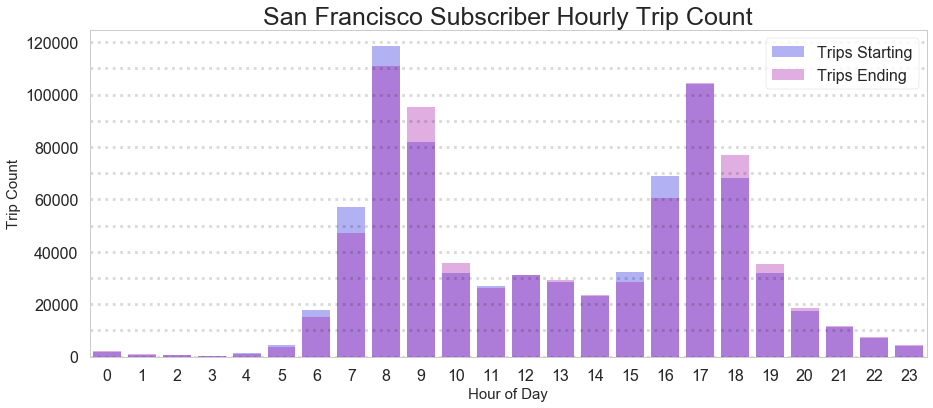

In [10]:
# SUBSCRIBERS
plot_hourly_trips(subscriber_trips, 
                  chart_title='San Francisco Subscriber Hourly Trip Count', 
                  file_name='../../charts/subscriber_trips_hourly.png', 
                  user_group='subs',
                  y_scale = 10000,
                  DO_WRITE_CHARTS=DO_WRITE_CHARTS)

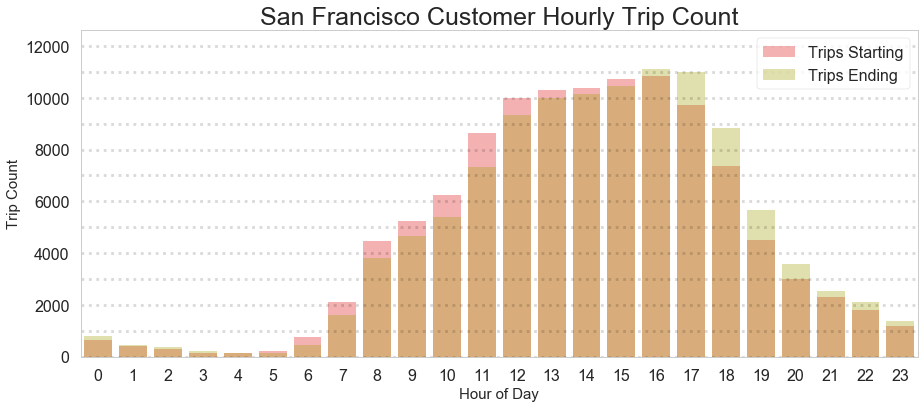

In [11]:
# CUSTOMERS
plot_hourly_trips(customer_trips, 
                  chart_title='San Francisco Customer Hourly Trip Count', 
                  file_name='../../charts/customer_trips_hourly.png', 
                  user_group='cust',
                  y_scale = 1000,
                  DO_WRITE_CHARTS=DO_WRITE_CHARTS)

# A1.3 -  Subscriber and Customer Weekly Trips

In [12]:
from investigationutils import plot_weekly_trips

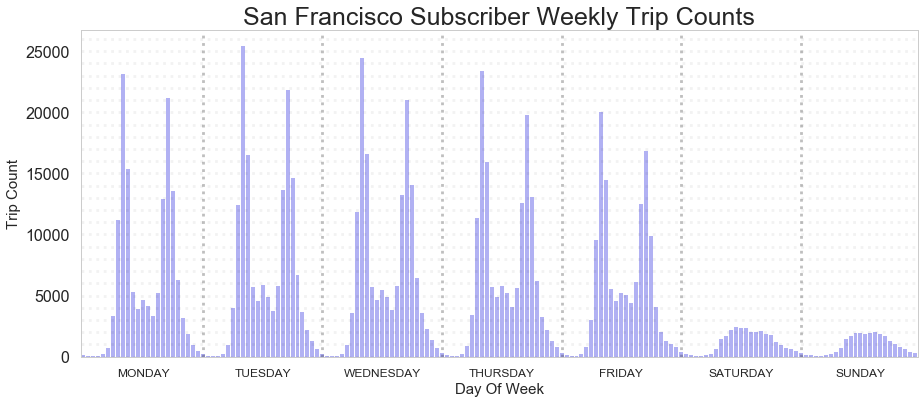

In [13]:
plot_weekly_trips(subscriber_trips, 
                  chart_title='San Francisco Subscriber Weekly Trip Counts', 
                  file_name='../../charts/subscriber_trips_weekly.png', 
                  user_group='subs', 
                  y_scale=1000, 
                  DO_WRITE_CHARTS=DO_WRITE_CHARTS)

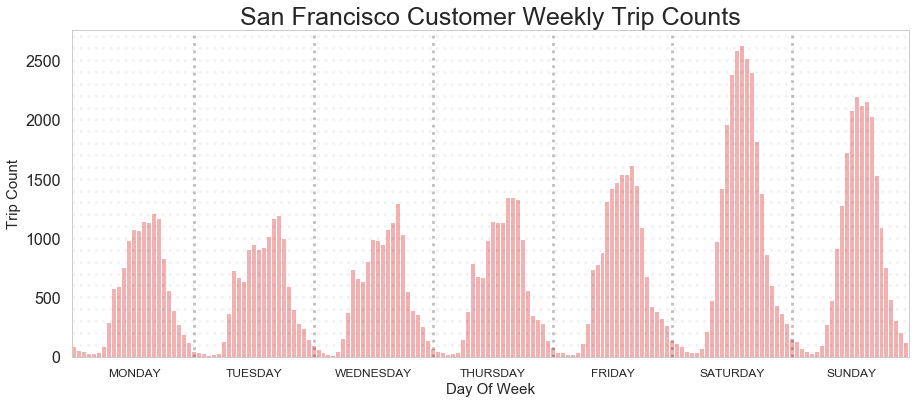

In [14]:
plot_weekly_trips(customer_trips, 
                  chart_title='San Francisco Customer Weekly Trip Counts', 
                  file_name='../../charts/customer_trips_weekly.png', 
                  user_group='cust', 
                  y_scale=100, 
                  DO_WRITE_CHARTS=DO_WRITE_CHARTS)

# A1.4 -  Subscriber and Customer Yearly Trips
<p> Holidays might play a role in the number of trips taken, this is the pseudo average day of the year each holiday takes place</p>

## A1.4.1 -  Some Important Yearly Dates

In [15]:
from investigationutils import plot_yearly_trips

In [16]:
significant_dates = {'4th of July' : 186,
                     'Labor Day' : 247,
                     'Christmas' : 359,
                     'Thanksgiving' : 330,
                     'Memorial Day' : 152}

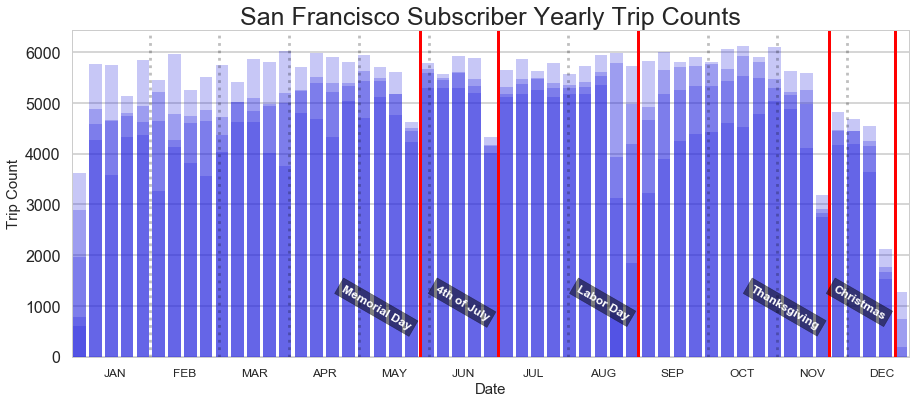

In [17]:
plot_yearly_trips(subscriber_trips, 
                  chart_title='San Francisco Subscriber Yearly Trip Counts', 
                  file_name='../../charts/subscriber_trips_yearly.png', 
                  user_group='subs', 
                  DO_WRITE_CHARTS=DO_WRITE_CHARTS, 
                  significant_dates=significant_dates)

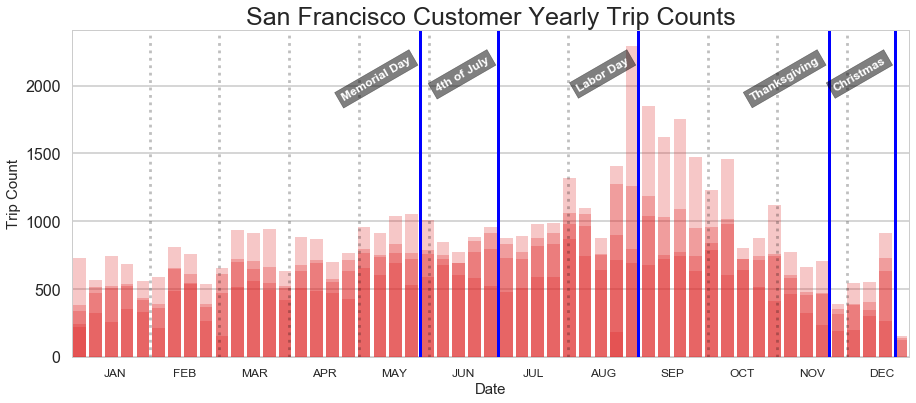

In [18]:
plot_yearly_trips(customer_trips, 
                  chart_title='San Francisco Customer Yearly Trip Counts', 
                  file_name='../../charts/customer_trips_yearly.png', 
                  user_group='cust', 
                  DO_WRITE_CHARTS=DO_WRITE_CHARTS, 
                  significant_dates=significant_dates)

In [19]:
trips.head(3)

,trip_id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,user_type,user_zip,duration_minutes,billed_minutes,billed_periods
0,913465,746,2015-09-01 00:10:00,San Francisco Caltrain 2 (330 Townsend),69,2015-09-01 00:23:00,San Francisco City Hall,58,238,Subscriber,94107,12.433333,13,3
1,913466,969,2015-09-01 00:15:00,Clay at Battery,41,2015-09-01 00:31:00,Washington at Kearny,46,16,Subscriber,94133,16.150000,17,4
2,913467,233,2015-09-01 00:15:00,Davis at Jackson,42,2015-09-01 00:19:00,Commercial at Montgomery,45,534,Subscriber,94111,3.883333,4,1


# B1.1 - Drilling in on Subscriber Usage, Commuters
<ol>Commuter Trips are Trips that meet the following conditions:
    <li>`user_type` is Subscriber</li>
    <li>`start_date` is a weekday</li>
    <li><ul>
        <li>Trip starts between 7am and 10am, OR between 4pm and 7pm</li>
        <li>Trip ends between 7am and 10am, OR between 4pm and 7pm</li>    
    </ul></li>
</ol>

In [20]:
print('Number of Trips:                   {:d}'.format(trips.shape[0]))

# user_type is subscriber
commuter_trips = trips[trips.user_type == 'Subscriber'].copy()
print('Number of Subscriber Trips:        {:d}'.format(commuter_trips.shape[0]))


# trip starts on a weekday
commuter_trips = commuter_trips[commuter_trips.start_date.dt.dayofweek < 5].copy()
print('Number of Weeday Subscriber Trips: {:d}'.format(commuter_trips.shape[0]))


# trip start_date or end_date is between 7am and 10am OR between 4pm and 7pm
commuter_trips = commuter_trips[(((commuter_trips.start_date.dt.hour >= 7) & (commuter_trips.start_date.dt.hour < 10)) | 
                                     ((commuter_trips.start_date.dt.hour >= 16) & (commuter_trips.start_date.dt.hour < 19))) | 
                                (((commuter_trips.end_date.dt.hour >= 7) & (commuter_trips.end_date.dt.hour < 10)) | 
                                     ((commuter_trips.end_date.dt.hour >= 16) & (commuter_trips.end_date.dt.hour < 19)))].copy()

print('Number of Commuter Trips:          {:d}'.format(commuter_trips.shape[0]))


am_commuter_trips = commuter_trips[(commuter_trips.start_date.dt.hour < 12) | (commuter_trips.end_date.dt.hour < 12)].copy()


pm_commuter_trips = commuter_trips[(commuter_trips.start_date.dt.hour > 12) | (commuter_trips.end_date.dt.hour > 12)].copy()



print('Number of Morning Commuter Trips:  {:d}'.format(am_commuter_trips.shape[0]))
print('Number of Evening Commuter Trips:  {:d}'.format(pm_commuter_trips.shape[0]))

Number of Trips:                   882190
Number of Subscriber Trips:        770752
Number of Weeday Subscriber Trips: 720389
Number of Commuter Trips:          492150
Number of Morning Commuter Trips:  254719
Number of Evening Commuter Trips:  237431


# Tag Commuter Trips and Write CSV

In [21]:
# tag am and pm commuter trips 
am_commuter_trip_ids = list(am_commuter_trips.trip_id.values)
pm_commuter_trip_ids = list(pm_commuter_trips.trip_id.values)
trips['is_commuter'] = 'non_commuter'
trips.loc[trips.trip_id.isin(am_commuter_trip_ids), 'is_commuter'] = 'am_commuter'
trips.loc[trips.trip_id.isin(pm_commuter_trip_ids), 'is_commuter'] = 'pm_commuter'


In [22]:
trips.to_csv('../../clean_data/bayareabikeshare/sf_trips_data_3hr_cleaned_tagged.csv')